In [2]:
# !pip install astropy astroquery jdaviz jwst 
!pip install reproject photutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0031.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 6.1 MB/s eta 0:00:000:00:01


In [8]:
from astroquery.mast import Observations
import os

# JWST filters to use for RGB and false color compositing
jwst_filters = ["F405N", "F360M", "F470N","F162M"]
# jwst_filters = ["F162M"]
proposal_id = 4147
target_name = "SGR-C"
# max_files_per_filter=30

base_dir = "data"
os.makedirs(base_dir, exist_ok=True)

for filt in jwst_filters:
    print(f"\n🔍 Searching for filter: {filt}")
    output_dir = os.path.join(base_dir, filt)
    os.makedirs(output_dir, exist_ok=True)

    # Search JWST NIRCam observations for SGR-C
    obs_table = Observations.query_criteria(
        obs_collection="JWST",
        instrument_name="NIRCAM/IMAGE",
        dataproduct_type="image",
        calib_level=3,
        filters=[filt],
        proposal_id=proposal_id,
        target_name=target_name
    )

    if len(obs_table) == 0:
        print(f"⚠️ No observations found for filter {filt}")
        continue

    # Get product list
    products = Observations.get_product_list(obs_table)

    # Filter for I2D FITS files (drizzled 2D)
    i2d_products = Observations.filter_products(
        products,
        productSubGroupDescription="I2D",
        extension="fits"
    )

    if len(i2d_products) == 0:
        print(f"⚠️ No I2D FITS files found for {filt}")
        continue

    # Choose first product (typically the full field)
    selected = i2d_products

    # Download file
    manifest = Observations.download_products(selected, download_dir=output_dir)
    print(f"✅ Downloaded {len(manifest)} file(s) for {filt} to {output_dir}")



🔍 Searching for filter: F405N


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.
2025-04-21 14:44:51,412 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147-o012_t001_nircam_f405n-f444w/jw04147-o012_t001_nircam_f405n-f444w_i2d.fits with expected size 360025920. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:44:51,818 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcalong/jw04147012001_04101_00001_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:52,231 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00001_nrcblong/jw04147012001_04101_00001_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:44:52,503 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcalong/jw04147012001_04101_00002_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:52,921 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:44:53,107 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalon

INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00002_nrcblong/jw04147012001_04101_00002_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcalong/jw04147012001_04101_00003_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:53,327 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:44:53,467 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalon

INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00003_nrcblong/jw04147012001_04101_00003_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:53,603 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcblong/jw04147012001_04101_00004_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:44:53,806 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcalong/jw04147012001_04101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:54,027 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblon

INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00005_nrcblong/jw04147012001_04101_00005_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcalong/jw04147012001_04101_00006_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.
2025-04-21 14:44:54,381 - stpipe - INFO - Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F405N/mastDownload/JWST/jw04147012001_04101_00006_nrcblong/jw04147012001_04101_00006_nrcblong_i2d.fits with expected size 120225600. [astroquery.query]
✅ Downloaded 13 file(s) for F405N to data/F405N

🔍 Searching for filter: F360M


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.
2025-04-21 14:47:07,099 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147-o012_t001_nircam_clear-f360m/jw04147-o012_t001_nircam_clear-f360m_i2d.fits with expected size 360146880. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:47:07,347 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcalong/jw04147012001_08101_00001_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:07,624 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00001_nrcblong/jw04147012001_08101_00001_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:47:08,039 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcalong/jw04147012001_08101_00002_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:08,485 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00002_nrcblong/jw04147012001_08101_00002_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:47:09,316 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcalong/jw04147012001_08101_00003_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:10,185 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00003_nrcblong/jw04147012001_08101_00003_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:47:10,578 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcalong/jw04147012001_08101_00004_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:11,313 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00004_nrcblong/jw04147012001_08101_00004_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600.
2025-04-21 14:47:11,564 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:11,789 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080.
INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcblong/jw04147012001_08101_00005_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600. [astroquery.query]


2025-04-21 14:47:11,989 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcalong/jw04147012001_08101_00006_nrcalong_i2d.fits with expected size 120225600.
INFO:astroquery:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.
2025-04-21 14:47:12,176 - stpipe - INFO - Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.
INFO:stpipe:Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080.


INFO: Found cached file data/F360M/mastDownload/JWST/jw04147012001_08101_00006_nrcblong/jw04147012001_08101_00006_nrcblong_i2d.fits with expected size 120286080. [astroquery.query]
✅ Downloaded 13 file(s) for F360M to data/F360M

🔍 Searching for filter: F470N
✅ Downloaded 13 file(s) for F470N to data/F470N

🔍 Searching for filter: F162M


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147-o012_t001_nircam_f150w2-f162m/jw04147-o012_t001_nircam_f150w2-f162m_i2d.fits with expected size 1732847040.
2025-04-21 14:50:58,755 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147-o012_t001_nircam_f150w2-f162m/jw04147-o012_t001_nircam_f150w2-f162m_i2d.fits with expected size 1732847040.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147-o012_t001_nircam_f150w2-f162m/jw04147-o012_t001_nircam_f150w2-f162m_i2d.fits with expected size 1732847040.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147-o012_t001_nircam_f150w2-f162m/jw04147-o012_t001_nircam_f150w2-f162m_i2d.fits with expected size 1732847040. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:50:59,017 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520.
2025-04-21 14:50:59,212 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca1/jw04147012001_04101_00001_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca2/jw04147012001_04101_00001_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca3/jw04147012001_04101_00001_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:50:59,476 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca3/jw04147012001_04101_00001_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca3/jw04147012001_04101_00001_nrca3_i2d.fits with expected size 119076480.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca4/jw04147012001_04101_00001_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:50:59,614 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca4/jw04147012001_04101_00001_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca4/jw04147012001_04101_00001_nrca4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca3/jw04147012001_04101_00001_nrca3_i2d.fits with expected size 119076480. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrca4/jw04147012001_04101_00001_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:50:59,805 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb1/jw04147012001_04101_00001_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:00,032 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb2/jw04147012001_04101_00001_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:00,239 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb3/jw04147012001_04101_00001_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:00,441 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00001_nrcb4/jw04147012001_04101_00001_nrcb4_i2d.fits with expected size 119016000.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:51:00,595 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca1/jw04147012001_04101_00002_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca2/jw04147012001_04101_00002_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:51:01,065 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca3/jw04147012001_04101_00002_nrca3_i2d.fits with expected size 119076480. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca4/jw04147012001_04101_00002_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:51:01,301 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca4/jw04147012001_04101_00002_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca4/jw04147012001_04101_00002_nrca4_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:51:01,441 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrca4/jw04147012001_04101_00002_nrca4_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb1/jw04147012001_04101_00002_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:01,583 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb2/jw04147012001_04101_00002_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:01,789 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb3/jw04147012001_04101_00002_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb4/jw04147012001_04101_00002_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:02,020 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb4/jw04147012001_04101_00002_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb4/jw04147012001_04101_00002_nrcb4_i2d.fits with expected size 119016000.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00002_nrcb4/jw04147012001_04101_00002_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca1/jw04147012001_04101_00003_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:51:02,241 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca1/jw04147012001_04101_00003_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca1/jw04147012001_04101_00003_nrca1_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca1/jw04147012001_04101_00003_nrca1_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca2/jw04147012001_04101_00003_nrca2_i2d.fits with expected size 118451520.
2025-04-21 14:51:02,474 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca2/jw04147012001_04101_00003_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca2/jw04147012001_04101_00003_nrca2_i2d.fits with expected size 118451520.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca2/jw04147012001_04101_00003_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca3/jw04147012001_04101_00003_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:51:02,796 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca3/jw04147012001_04101_00003_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca3/jw04147012001_04101_00003_nrca3_i2d.fits with expected size 119076480.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca4/jw04147012001_04101_00003_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:51:02,992 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca4/jw04147012001_04101_00003_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca4/jw04147012001_04101_00003_nrca4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca3/jw04147012001_04101_00003_nrca3_i2d.fits with expected size 119076480. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrca4/jw04147012001_04101_00003_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:51:03,136 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb1/jw04147012001_04101_00003_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:03,341 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:03,536 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb2/jw04147012001_04101_00003_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb3/jw04147012001_04101_00003_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb4/jw04147012001_04101_00003_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:03,672 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb4/jw04147012001_04101_00003_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb4/jw04147012001_04101_00003_nrcb4_i2d.fits with expected size 119016000.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00003_nrcb4/jw04147012001_04101_00003_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:51:03,877 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520.
2025-04-21 14:51:04,025 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca1/jw04147012001_04101_00004_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca2/jw04147012001_04101_00004_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca3/jw04147012001_04101_00004_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:51:04,167 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca3/jw04147012001_04101_00004_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca3/jw04147012001_04101_00004_nrca3_i2d.fits with expected size 119076480.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:51:04,355 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca3/jw04147012001_04101_00004_nrca3_i2d.fits with expected size 119076480. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrca4/jw04147012001_04101_00004_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb1/jw04147012001_04101_00004_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:51:04,558 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb1/jw04147012001_04101_00004_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb1/jw04147012001_04101_00004_nrcb1_i2d.fits with expected size 118491840.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:04,758 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb1/jw04147012001_04101_00004_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb2/jw04147012001_04101_00004_nrcb2_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:05,120 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb4/jw04147012001_04101_00004_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:05,249 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb4/jw04147012001_04101_00004_nrcb4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb3/jw04147012001_04101_00004_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00004_nrcb4/jw04147012001_04101_00004_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca1/jw04147012001_04101_00005_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:51:05,439 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca1/jw04147012001_04101_00005_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca1/jw04147012001_04101_00005_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520.
2025-04-21 14:51:05,610 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca1/jw04147012001_04101_00005_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca2/jw04147012001_04101_00005_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:51:05,744 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca4/jw04147012001_04101_00005_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:51:05,920 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca4/jw04147012001_04101_00005_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca4/jw04147012001_04101_00005_nrca4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca3/jw04147012001_04101_00005_nrca3_i2d.fits with expected size 119076480. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrca4/jw04147012001_04101_00005_nrca4_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:51:06,101 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:06,276 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb1/jw04147012001_04101_00005_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:06,502 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb4/jw04147012001_04101_00005_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:06,648 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb4/jw04147012001_04101_00005_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb4/jw04147012001_04101_00005_nrcb4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb3/jw04147012001_04101_00005_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb4/jw04147012001_04101_00005_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.
2025-04-21 14:51:06,847 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca2/jw04147012001_04101_00006_nrca2_i2d.fits with expected size 118451520.
2025-04-21 14:51:07,027 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca2/jw04147012001_04101_00006_nrca2_i2d.fits with expected size 118451520.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca2/jw04147012001_04101_00006_nrca2

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca1/jw04147012001_04101_00006_nrca1_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca2/jw04147012001_04101_00006_nrca2_i2d.fits with expected size 118451520. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.
2025-04-21 14:51:07,155 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca3/jw04147012001_04101_00006_nrca3_i2d.fits with expected size 119076480. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280.
2025-04-21 14:51:07,391 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb1/jw04147012001_04101_00006_nrcb1_i2d.fits with expected size 118491840.
2025-04-21 14:51:07,577 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb1/jw04147012001_04101_00006_nrcb1_i2d.fits with expected size 118491840.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb1/jw04147012001_04101_00006_nrcb1

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrca4/jw04147012001_04101_00006_nrca4_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb1/jw04147012001_04101_00006_nrcb1_i2d.fits with expected size 118491840. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.
2025-04-21 14:51:07,776 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280.


INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb2/jw04147012001_04101_00006_nrcb2_i2d.fits with expected size 118673280. [astroquery.query]


INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280.
2025-04-21 14:51:08,089 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280.
INFO:astroquery:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000.
2025-04-21 14:51:08,273 - stpipe - INFO - Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000.
INFO:stpipe:Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4

INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb3/jw04147012001_04101_00006_nrcb3_i2d.fits with expected size 118673280. [astroquery.query]
INFO: Found cached file data/F162M/mastDownload/JWST/jw04147012001_04101_00006_nrcb4/jw04147012001_04101_00006_nrcb4_i2d.fits with expected size 119016000. [astroquery.query]
✅ Downloaded 49 file(s) for F162M to data/F162M


Exception in thread Exception in threading.excepthook:
Exception ignored in thread started by: <bound method Thread._bootstrap of <Thread(Thread-1621 (_watch_active), started 125099997898432)>>
Traceback (most recent call last):
  File "/home/joel-kinny/anaconda3/envs/jwst_latest/lib/python3.12/threading.py", line 1032, in _bootstrap
      File "/home/joel-kinny/anaconda3/envs/jwst_latest/lib/python3.12/threading.py", line 1077, in _bootstrap_inner
    self._invoke_excepthook(self)
  File "/home/joel-kinny/anaconda3/envs/jwst_latest/lib/python3.12/threading.py", line 1391, in invoke_excepthook
    local_print("Exception in threading.excepthook:",
  File "/home/joel-kinny/anaconda3/envs/jwst_latest/lib/python3.12/site-packages/ipykernel/iostream.py", line 604, in flush
      File "/home/joel-kinny/anaconda3/envs/jwst_latest/lib/python3.12/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
    ^^^^^^^^^^^^^^^^
  File "/home/joel-kinny/anaconda3/env

📂 Selected: data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2_i2d.fits


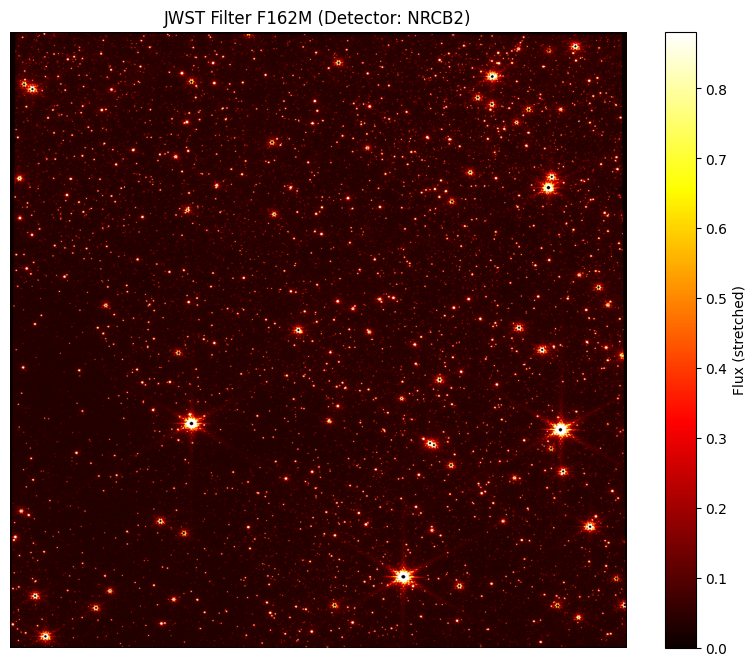

⚠️ No matching file for filter F360M with detector nrcb2
⚠️ No matching file for filter F405N with detector nrcb2
⚠️ No matching file for filter F470N with detector nrcb2


In [5]:
import os
import glob
import re
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

filters = ['F162M', 'F360M', 'F405N', 'F470N']
selected_files = {}

# 💡 SET YOUR DETECTOR HERE
detector_id = "nrcb2"  # e.g., 'nrcb1', 'nrcb3', 'nrcalong'

# Helper: regex to extract detector ID
def extract_detector(filename):
    match = re.search(r'jw\d+_\d+_\d+_(nrc[a-z0-9]+)', filename, re.IGNORECASE)
    return match.group(1).lower() if match else None

# print(f"📌 Base file for alignment: {f162m_file}")
# print(f"🔍 Using detector ID: {detector_id}")

# Step 2: Match all filters to the same detector
for filt in filters:
    search_path = os.path.join('data', filt, '**', '*_i2d.fits')
    fits_files = glob.glob(search_path, recursive=True)

    matching_file = None
    for f in fits_files:
        if extract_detector(f) == detector_id:
            matching_file = f
            break

    if not matching_file:
        print(f"⚠️ No matching file for filter {filt} with detector {detector_id}")
        continue

    print(f"📂 Selected: {matching_file}")
    selected_files[filt] = matching_file

    # --- Load and display the FITS image ---
    with fits.open(matching_file) as hdul:
        data = hdul['SCI'].data
        image = data[0] if data.ndim == 3 else data

    image = np.nan_to_num(image)

    # Normalize and stretch
    vmin, vmax = np.percentile(image, [1, 99.5])
    image_clipped = np.clip(image, vmin, vmax)
    stretched = np.arcsinh((image_clipped - vmin) / (vmax - vmin + 1e-8))

    # Display
    plt.figure(figsize=(10, 8))
    plt.imshow(stretched, cmap='hot', origin='lower')
    plt.title(f"JWST Filter {filt.upper()} (Detector: {detector_id.upper()})")
    plt.colorbar(label='Flux (stretched)')
    plt.axis('off')
    plt.show()


In [3]:
from astropy.io import fits
from jdaviz import Imviz
from IPython.display import display
import glob
import os

# --- Locate the FITS file ---
filt = 'F115W'
search_path = os.path.join('data', filt, '**', '*_i2d.fits')
fits_files = glob.glob(search_path, recursive=True)

if not fits_files:
    print(f"❌ No I2D FITS file found for filter {filt}")
else:
    file_path = fits_files[0]
    print(f"📂 Found: {file_path}")

    # --- Launch jdaviz Imviz viewer ---
    imviz = Imviz()
    imviz.load_data(file_path)
    display(imviz.app)



📂 Found: data/F115W/mastDownload/JWST/jw04147012001_08101_00005_nrca4/jw04147012001_08101_00005_nrca4_i2d.fits


<IPython.core.display.Javascript object>

Application(config='imviz', docs_link='https://jdaviz.readthedocs.io/en/v4.2.1/imviz/index.html', events=['cal…

In [9]:
from astropy.io import fits
import os
import glob
from collections import defaultdict

base_dir = 'data'
detector_groups = defaultdict(list)

# Look for all *_i2d.fits files in the full download directory
fits_files = glob.glob(os.path.join(base_dir, '*', '**', '*_i2d.fits'), recursive=True)

# Scan each file and group by DETECTOR keyword
for file_path in fits_files:
    try:
        with fits.open(file_path) as hdul:
            header = hdul[0].header
            detector = header.get('DETECTOR', 'UNKNOWN')
            filt = header.get('FILTER', 'UNKNOWN')

            detector_groups[detector].append({
                'file': file_path,
                'filter': filt
            })
    except Exception as e:
        print(f"⚠️ Failed to read {file_path}: {e}")

# Print the grouped files
print("\n🔍 Detectors and filters available:")
for det, files in detector_groups.items():
    print(f"\n🧪 {det} ({len(files)} files):")
    for entry in files:
        print(f"   - Filter: {entry['filter']:7s} | {os.path.basename(entry['file'])}")



🔍 Detectors and filters available:

🧪 NRCB2 (9 files):
   - Filter: F150W2  | jw04147012001_04101_00005_nrcb2_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00002_nrcb2_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00004_nrcb2_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00006_nrcb2_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00003_nrcb2_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00001_nrcb2_i2d.fits
   - Filter: F182M   | jw04147012001_06101_00002_nrcb2_i2d.fits
   - Filter: F182M   | jw04147012001_06101_00005_nrcb2_i2d.fits
   - Filter: F212N   | jw04147012001_02101_00004_nrcb2_i2d.fits

🧪 NRCB3 (11 files):
   - Filter: F150W2  | jw04147012001_04101_00006_nrcb3_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00003_nrcb3_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00001_nrcb3_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00005_nrcb3_i2d.fits
   - Filter: F150W2  | jw04147012001_04101_00002_nrcb3_i2d.fits
   - Filter: F150W2  | jw04

📂 Loading F162M: ./data/F162M/mastDownload/JWST/jw04147012001_04101_00005_nrcb2/jw04147012001_04101_00005_nrcb2_i2d.fits
📂 Loading F360M: ./data/F360M/mastDownload/JWST/jw04147012001_08101_00005_nrcalong/jw04147012001_08101_00005_nrcalong_i2d.fits
   🔁 Reprojected shape: (2058, 2058), min: nan, max: nan
📂 Loading F405N: ./data/F405N/mastDownload/JWST/jw04147012001_04101_00004_nrcalong/jw04147012001_04101_00004_nrcalong_i2d.fits
   🔁 Reprojected shape: (2058, 2058), min: nan, max: nan
📂 Loading F470N: ./data/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcalong/jw04147012001_02101_00001_nrcalong_i2d.fits
   🔁 Reprojected shape: (2058, 2058), min: nan, max: nan

✅ All filters aligned!


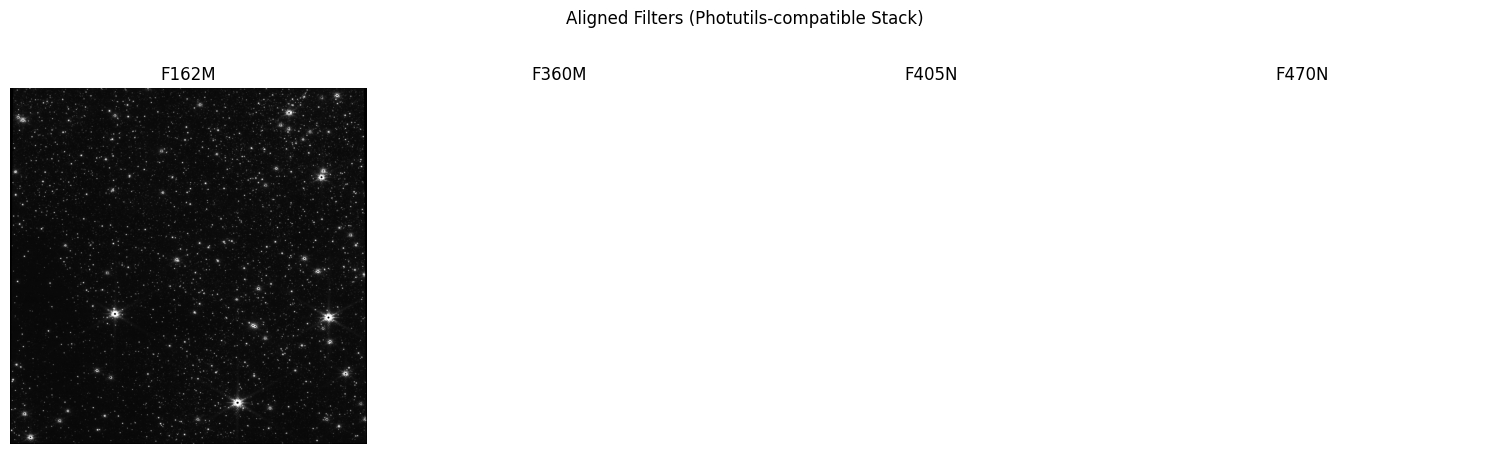

In [12]:
import os
import glob
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp, reproject_exact
import matplotlib.pyplot as plt

# --- Filters to stack ---
filters = ['F162M', 'F360M', 'F405N', 'F470N']
base_dir = './data'
stacked_data = {}
ref_wcs = None
ref_shape = None

# --- Load and align each filter ---
for filt in filters:
    pattern = os.path.join(base_dir, filt, '**', '*_i2d.fits')
    files = glob.glob(pattern, recursive=True)
    if not files:
        print(f"❌ No file found for {filt}")
        continue

    file_path = files[0]
    print(f"📂 Loading {filt}: {file_path}")

    with fits.open(file_path) as hdul:
        data = hdul['SCI'].data
        header = hdul['SCI'].header
        wcs = WCS(header)

        if data.ndim == 3:
            data = data[0]

        # Clean and stretch
        data = np.nan_to_num(data)
        vmin, vmax = np.percentile(data, [1, 99.5])
        clipped = np.clip(data, vmin, vmax)
        norm = np.arcsinh((clipped - vmin) / (vmax - vmin + 1e-8))

        # Store reference WCS and shape
        if ref_wcs is None:
            ref_wcs = wcs
            ref_shape = norm.shape
            stacked_data[filt] = norm
        else:
            aligned, _ = reproject_interp((norm, wcs), ref_wcs, shape_out=ref_shape)
            print(f"   🔁 Reprojected shape: {aligned.shape}, min: {np.min(aligned):.3f}, max: {np.max(aligned):.3f}")
            stacked_data[filt] = aligned

print("\n✅ All filters aligned!")

# --- Optional: show comparison ---
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i, filt in enumerate(filters):
    if filt in stacked_data:
        axs[i].imshow(stacked_data[filt], origin='lower', cmap='gray')
        axs[i].set_title(filt)
        axs[i].axis('off')
plt.suptitle("Aligned Filters (Photutils-compatible Stack)")
plt.tight_layout()
plt.show()


Max values:
  🔵 F162M (B): 0.8814
  🟢 F360M (O): nan
  🔴 F405N:     nan
  🔴 F470N:     nan
F360M: NaNs = 4235364/4235364 (100.00%)
F405N: NaNs = 4235364/4235364 (100.00%)
F470N: NaNs = 4235364/4235364 (100.00%)
F162M: NaNs = 0/4235364 (0.00%)


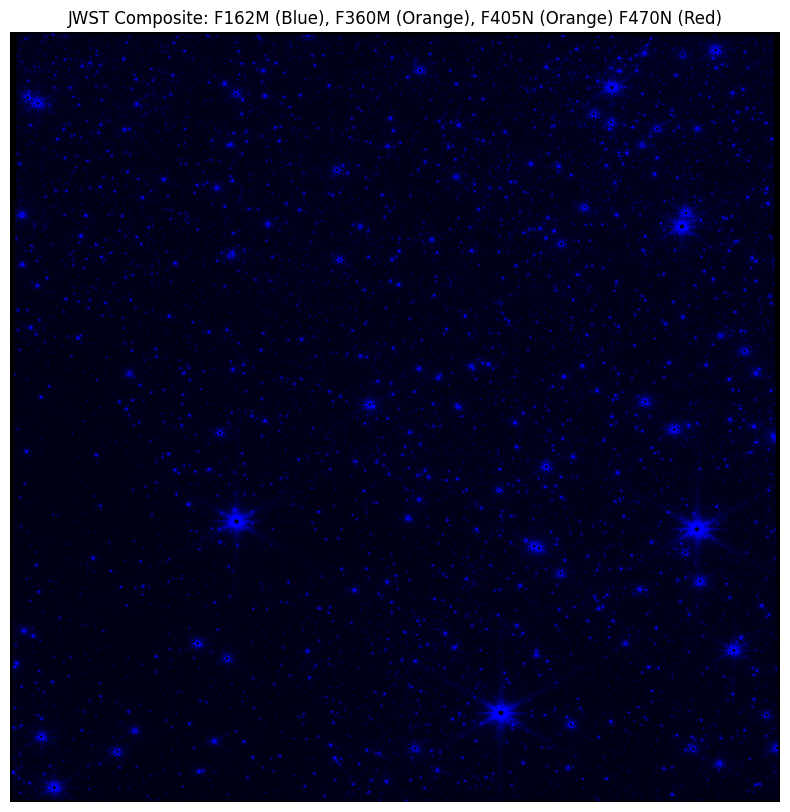

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Confirm required filters are available ---
required_filters = ['F162M', 'F360M', 'F405N', 'F470N']
for f in required_filters:
    if f not in stacked_data:
        raise ValueError(f"❌ Missing filter in stacked_data: {f}")

# --- Normalize individual channels ---
B = stacked_data['F162M']
O = stacked_data['F360M']
C = stacked_data['F405N']
R = stacked_data['F470N']

print(f"Max values:")
print(f"  🔵 F162M (B): {np.max(B):.4f}")
print(f"  🟢 F360M (O): {np.max(O):.4f}")
print(f"  🔴 F405N:     {np.max(C):.4f}")
print(f"  🔴 F470N:     {np.max(R):.4f}")

def check_stats(data, name):
    total = data.size
    nan_count = np.isnan(data).sum()
    print(f"{name}: NaNs = {nan_count}/{total} ({nan_count/total:.2%})")

for filt in ['F360M', 'F405N', 'F470N', 'F162M']:
    check_stats(stacked_data[filt], filt)

def norm_band(data, stretch=True, scale=5.0):
    data = np.nan_to_num(data)
    data = data / (np.max(data) + 1e-8)
    return np.arcsinh(data * scale) / np.arcsinh(scale) if stretch else data
# Get stretched & normalized channels
F162M = norm_band(stacked_data["F162M"])  # Blue
F405N = norm_band(stacked_data["F405N"])  # Cyan = G + B
F360M = norm_band(stacked_data["F360M"])  # Orange = R + G
F470N = norm_band(stacked_data["F470N"])  # Red

# Create RGB from hue mapping
rgb = np.zeros((*F162M.shape, 3))

# Blue: F162M
rgb[..., 2] += F162M

# Cyan: F405N = B + G
rgb[..., 2] += 0.5 * F405N
rgb[..., 1] += 0.5 * F405N

# Orange: F360M = R + G
rgb[..., 0] += 0.6 * F360M
rgb[..., 1] += 0.4 * F360M

# Red: F470N
rgb[..., 0] += F470N

# Normalize & clip
rgb = np.clip(rgb, 0, 1)

# --- Display the RGB composite ---
plt.figure(figsize=(10, 10))
plt.imshow(rgb, origin='lower')
plt.axis('off')
plt.title("JWST Composite: F162M (Blue), F360M (Orange), F405N (Orange) F470N (Red)")
plt.show()


📂 Using file: sgrc_download/F115W/mastDownload/JWST/jw04147012001_08101_00006_nrcb1/jw04147012001_08101_00006_nrcb1_i2d.fits


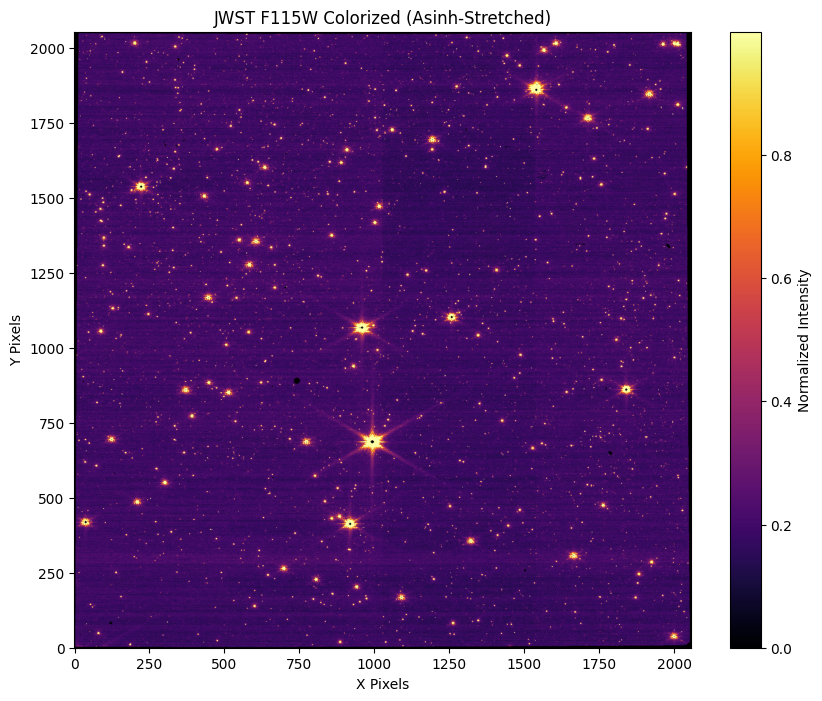

In [ ]:
import os
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# --- Locate the F115W FITS file ---
pattern = os.path.join("data", "F115W", "**", "*_i2d.fits")
files = glob.glob(pattern, recursive=True)

if not files:
    print("❌ No F115W I2D FITS file found.")
else:
    fits_file = files[0]
    print(f"📂 Using file: {fits_file}")

    # --- Load the FITS data ---
    with fits.open(fits_file) as hdul:
        data = hdul['SCI'].data
        if data.ndim == 3:
            data = data[0]  # use first integration

    # --- Clean the data ---
    data = np.nan_to_num(data)

    # --- Normalize using percentiles ---
    vmin, vmax = np.percentile(data, [1, 99.5])
    clipped = np.clip(data, vmin, vmax)

    # --- Apply stretch (asinh gives good balance) ---
    stretched = np.arcsinh((clipped - vmin) / (vmax - vmin + 1e-8))
    norm = stretched / (np.max(stretched) + 1e-8)

    # --- Map grayscale to pseudo-color (cmap) ---
    plt.figure(figsize=(10, 8))
    plt.imshow(norm, cmap='inferno', origin='lower')  # Try 'inferno', 'viridis', 'cividis' too!
    plt.title("JWST F115W Colorized (Asinh-Stretched)")
    plt.colorbar(label="Normalized Intensity")
    plt.xlabel("X Pixels")
    plt.ylabel("Y Pixels")
    plt.show()


In [ ]:
# import wandb
# !wandb login 5c17f0ac8aa595dc337fcff452b3e0a33d4c7a76
# #5c17f0ac8aa595dc337fcff452b3e0a33d4c7a76
# 5c17f0ac8aa595dc337fcff452b3e0a33d4c7a76

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

: 

: 

In [6]:
import random

import wandb

# Start a new wandb run to track this script.
run = wandb.init(
    # Set the wandb entity where your project will be logged (generally your team name).
    # Set the wandb project where this run will be logged.
    project="astrounet-jwst",
    # Track hyperparameters and run metadata.
    config={
        "learning_rate": 0.02,
        "architecture": "CNN",
        "dataset": "CIFAR-100",
        "epochs": 10,
    },
)

# Simulate training.
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset

    # Log metrics to wandb.
    run.log({"acc": acc, "loss": loss})

# Finish the run and upload any remaining data.
run.finish()

✅ Detected 49933 stars.


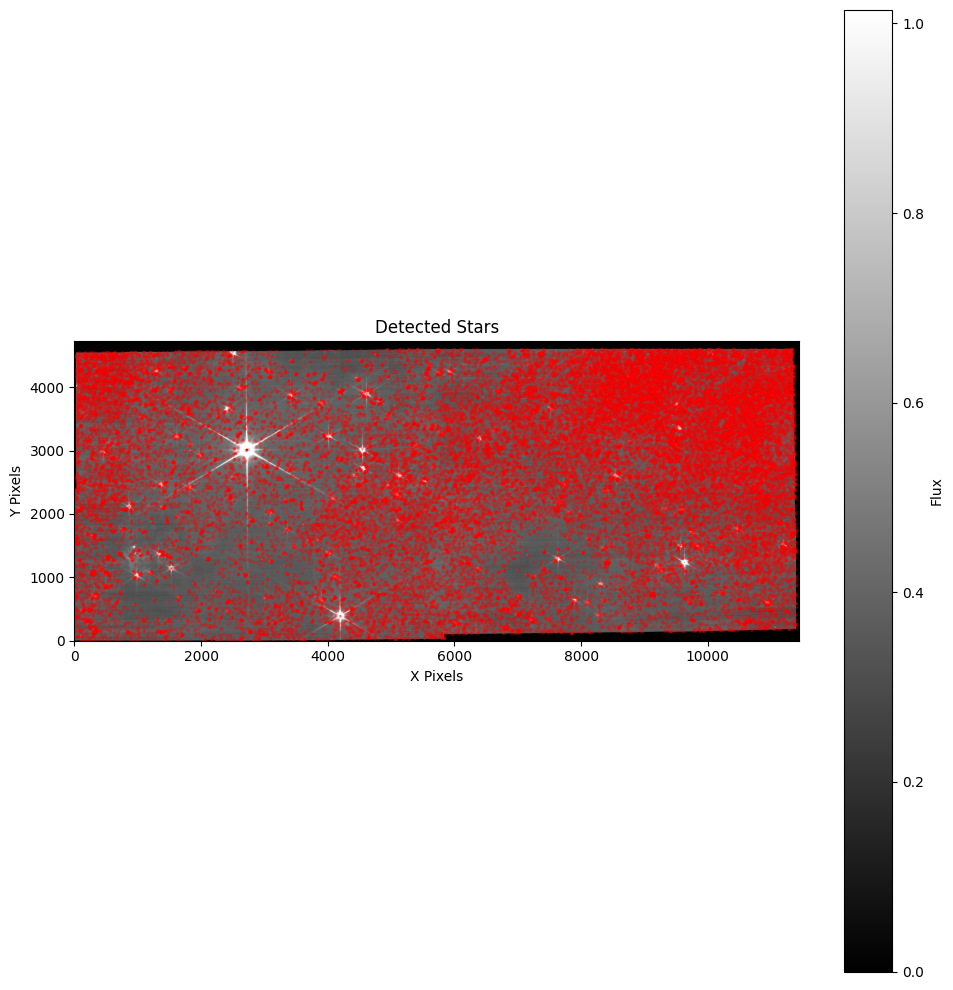

In [2]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.table import Table
from jdaviz import Imviz
import numpy as np

# 1) Load your denoised FITS into Imviz
denoised_fits = "jwst_denoised_full.fits"
# imviz = Imviz()
# imviz.load_data(denoised_fits)

# display(imviz.app)

from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Load the image ===
# fits_file = "path/to/your_denoised.fits"  # replace with your file path
with fits.open(denoised_fits) as hdul:
    data = hdul[1].data if 'SCI' in hdul else hdul[0].data

# If it's 3D (e.g., [1, H, W]), squeeze it
if data.ndim == 3:
    data = data[0]

# === Step 2: Clean and normalize ===
data = np.nan_to_num(data)
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

# === Step 3: Run DAOStarFinder ===
daofind = DAOStarFinder(fwhm=3.0, threshold=5. * std)
sources = daofind(data - median)

print(f"✅ Detected {len(sources)} stars.")

# === Step 4: Plot detections ===
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray', origin='lower', vmin=np.percentile(data, 1), vmax=np.percentile(data, 99.5))
plt.title("Detected Stars")
plt.colorbar(label='Flux')

# Overlay the positions
# for star in sources:
#     x, y = star['xcentroid'], star['ycentroid']
#     plt.plot(x, y, marker='o', markersize=10, markeredgewidth=1.5,
#              markeredgecolor='cyan', markerfacecolor='none')

plt.plot(sources['xcentroid'], sources['ycentroid'], 'r.', markersize=1.5, alpha=0.2)

plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.tight_layout()
plt.show()



🔭 Original JWST image detections: 8242
✨ Denoised image detections: 49933


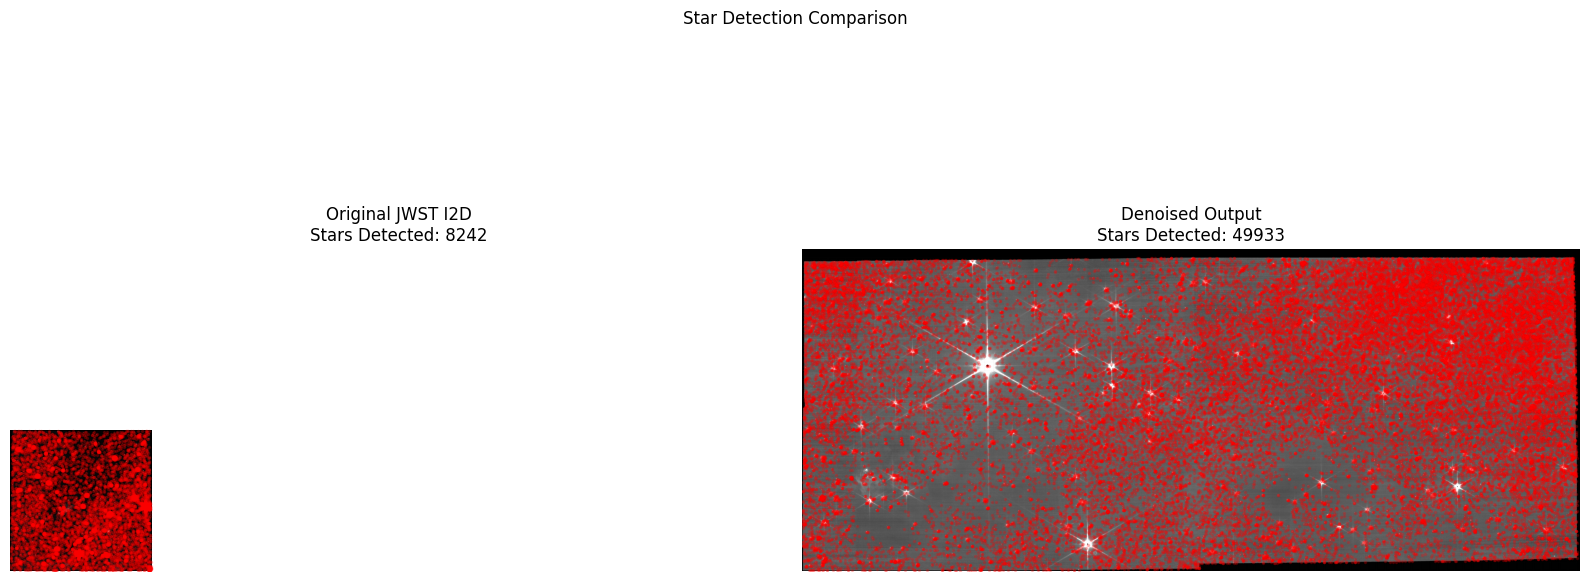

In [7]:
#Compairing with original image

from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
import matplotlib.pyplot as plt
import numpy as np

def load_image(fits_path):
    with fits.open(fits_path) as hdul:
        data = hdul['SCI'].data if 'SCI' in hdul else hdul[0].data
    return np.nan_to_num(data[0] if data.ndim == 3 else data)

def detect_stars(image, fwhm=3.0, threshold_sigma=5.0):
    mean, median, std = sigma_clipped_stats(image, sigma=3.0)
    daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold_sigma * std)
    sources = daofind(image - median)
    return sources

# === Paths ===
i2d_path = "data/F470N/mastDownload/JWST/jw04147012001_02101_00001_nrcalong/jw04147012001_02101_00001_nrcalong_i2d.fits"         # original JWST
denoised_path = "jwst_denoised_full.fits"                             # your model output

# === Load images ===
original_img = load_image(i2d_path)
denoised_img = load_image(denoised_path)

# === Detect sources ===
sources_orig = detect_stars(original_img)
sources_denoised = detect_stars(denoised_img)

print(f"🔭 Original JWST image detections: {len(sources_orig)}")
print(f"✨ Denoised image detections: {len(sources_denoised)}")

# === Plot comparison ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

for ax, img, sources, title in zip(
    [ax1, ax2],
    [original_img, denoised_img],
    [sources_orig, sources_denoised],
    ["Original JWST I2D", "Denoised Output"]
):
    ax.imshow(img, cmap='gray', origin='lower',
              vmin=np.percentile(img, 1), vmax=np.percentile(img, 99.5))
    ax.plot(sources['xcentroid'], sources['ycentroid'], 'r.', markersize=3, alpha=0.2)
    ax.set_title(f"{title}\nStars Detected: {len(sources)}")
    ax.axis("off")

plt.suptitle("Star Detection Comparison")
plt.tight_layout()
plt.show()
